In [179]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msno
from sockshandler import merge_dict


In [180]:
df_pollutants = pd.read_csv("/data/AQI data/AQI_hourly.csv", sep=";", decimal=',', encoding="utf-8")

df_pollutants.shape

/var/folders/0c/_lmn88gn06gfqbnmjydqyxgm0000gn/T/ipykernel_2754/2100902137.py:1: DtypeWarning: Columns (4,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pollutants = pd.read_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/AQI data/AQI_hourly.csv", sep=";", decimal=',', encoding="utf-8")


(96424, 13)

In [181]:
df_pollutants.head()

,Date,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_PM2.5,Station2_SO2
0,2014-01-01 00:00:00,857.0,19.2,31.5,72,NaN,880.0,10.3,11.5,"13,4",40,NaN,8.3
1,2014-01-01 01:00:00,845.0,21.8,33.0,58,NaN,933.0,12.0,16.1,"12,0",52,NaN,7.3
2,2014-01-01 02:00:00,819.0,27.9,44.6,55,NaN,862.0,12.7,14.9,"10,8",29,NaN,6.8
3,2014-01-01 03:00:00,869.0,29.4,49.1,50,NaN,936.0,11.6,13.8,"10,2",29,NaN,6.4
4,2014-01-01 04:00:00,841.0,33.8,57.4,51,NaN,877.0,12.9,15.4,"9,6",33,NaN,3.7


In [182]:
df_pollutants.dtypes

Date               object
Station1_CO       float64
Station1_NO2      float64
Station1_NOx      float64
Station1_PM10      object
Station1_SO2      float64
Station2_CO       float64
Station2_NO2      float64
Station2_NOx      float64
Station2_O3        object
Station2_PM10      object
Station2_PM2.5    float64
Station2_SO2      float64
dtype: object

In [183]:
df_pollutants['Date'] = pd.to_datetime(df_pollutants['Date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
cols = [col for col in df_pollutants.columns if col != 'Date']

In [184]:
df_pollutants.dtypes

Date              datetime64[ns]
Station1_CO              float64
Station1_NO2             float64
Station1_NOx             float64
Station1_PM10             object
Station1_SO2             float64
Station2_CO              float64
Station2_NO2             float64
Station2_NOx             float64
Station2_O3               object
Station2_PM10             object
Station2_PM2.5           float64
Station2_SO2             float64
dtype: object

In [185]:
df_pollutants.head()

,Date,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_PM2.5,Station2_SO2
0,2014-01-01 00:00:00,857.0,19.2,31.5,72,NaN,880.0,10.3,11.5,"13,4",40,NaN,8.3
1,2014-01-01 01:00:00,845.0,21.8,33.0,58,NaN,933.0,12.0,16.1,"12,0",52,NaN,7.3
2,2014-01-01 02:00:00,819.0,27.9,44.6,55,NaN,862.0,12.7,14.9,"10,8",29,NaN,6.8
3,2014-01-01 03:00:00,869.0,29.4,49.1,50,NaN,936.0,11.6,13.8,"10,2",29,NaN,6.4
4,2014-01-01 04:00:00,841.0,33.8,57.4,51,NaN,877.0,12.9,15.4,"9,6",33,NaN,3.7


In [186]:
df_copy = df_pollutants.copy()
df_copy.set_index('Date', inplace=True)
df_copy

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_PM2.5,Station2_SO2
Date,,,,,,,,,,,,
2014-01-01 00:00:00,857.0,19.2,31.5,72,NaN,880.0,10.3,11.5,"13,4",40,NaN,8.3
2014-01-01 01:00:00,845.0,21.8,33.0,58,NaN,933.0,12.0,16.1,"12,0",52,NaN,7.3
2014-01-01 02:00:00,819.0,27.9,44.6,55,NaN,862.0,12.7,14.9,"10,8",29,NaN,6.8
2014-01-01 03:00:00,869.0,29.4,49.1,50,NaN,936.0,11.6,13.8,"10,2",29,NaN,6.4
2014-01-01 04:00:00,841.0,33.8,57.4,51,NaN,877.0,12.9,15.4,"9,6",33,NaN,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,NaN,20.3,37.2,23.0,NaN,791.0,10.6,11.2,NaN,NaN,29.0,4.6
2024-12-31 20:00:00,NaN,21.7,36.1,20.0,NaN,772.0,10.4,11.2,NaN,NaN,29.0,4.4
2024-12-31 21:00:00,NaN,17.5,30.6,24.0,NaN,799.0,9.5,10.0,NaN,NaN,24.0,4.7


<Axes: >

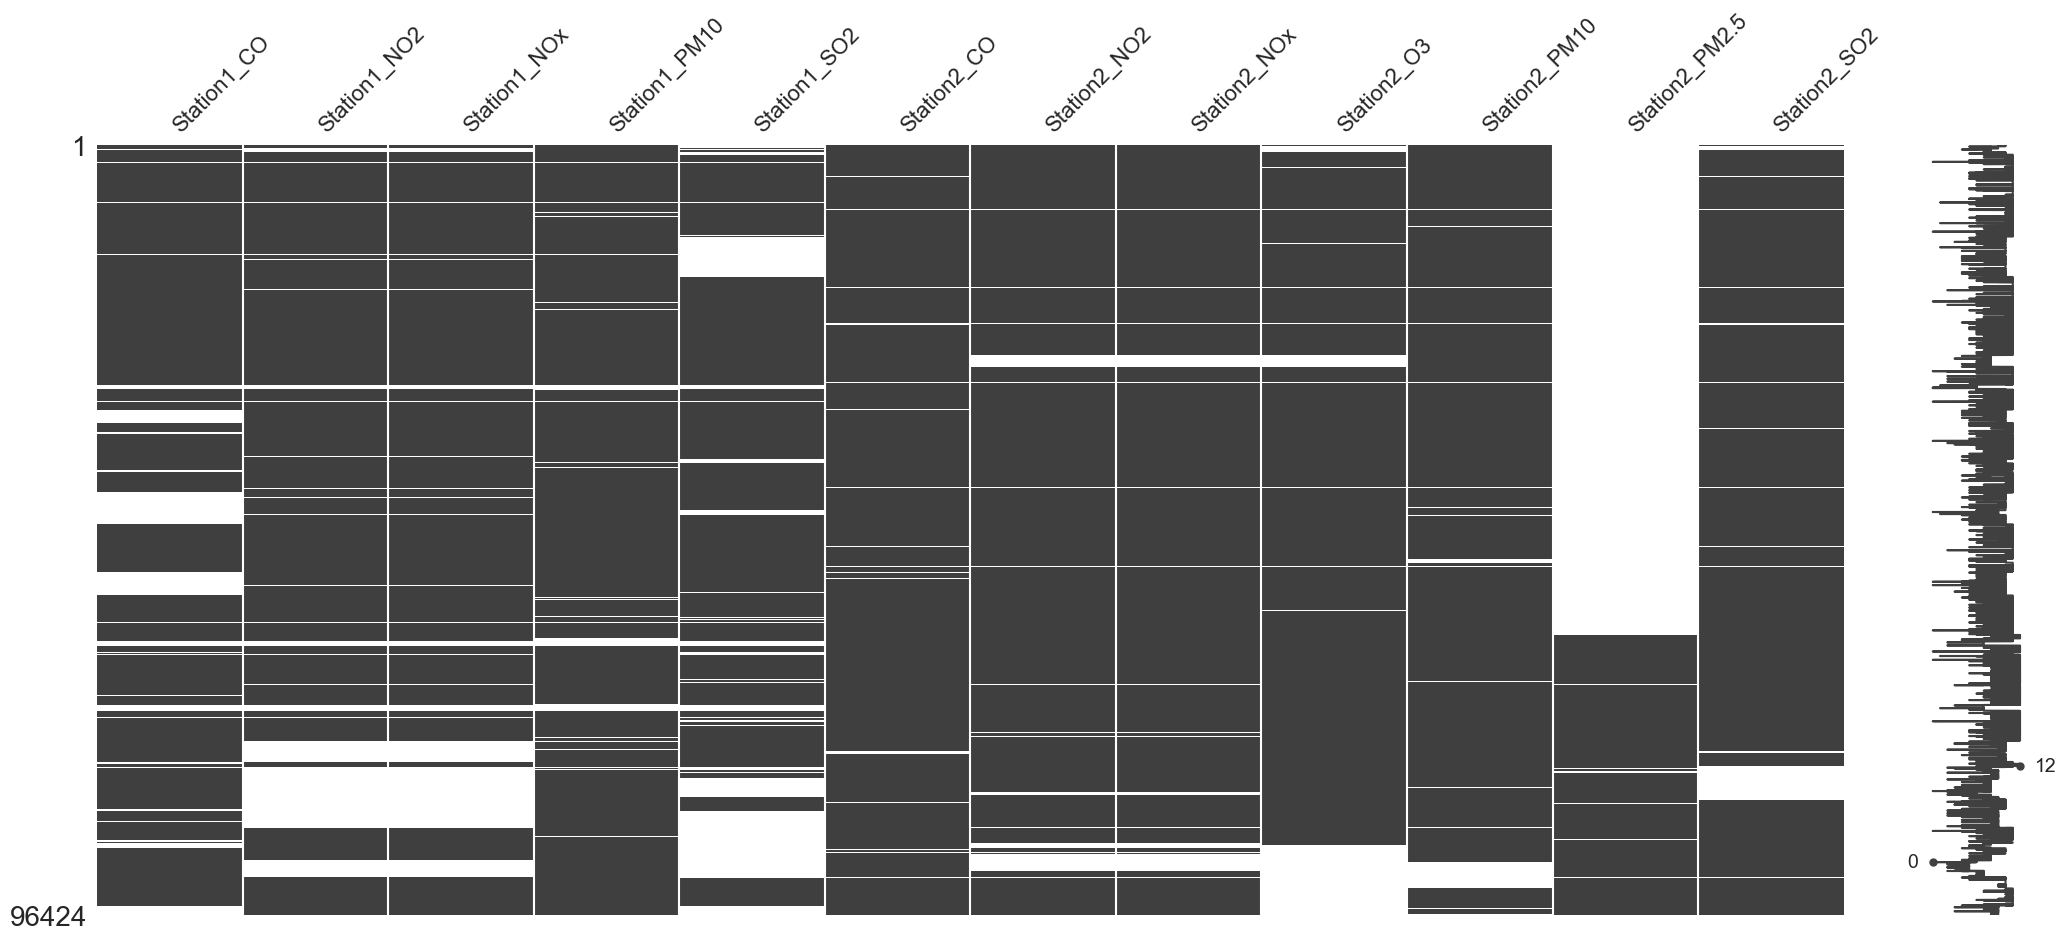

In [187]:
msno.matrix(df_copy)

In [188]:
df_pollutants.set_index('Date', inplace=True)
df_pollutants['Year'] = df_pollutants.index.year
df_pollutants['Month'] = df_pollutants.index.month
df_pollutants['Day'] = df_pollutants.index.day
df_pollutants['WeekDay'] = df_pollutants.index.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    
df_pollutants['Season'] = df_pollutants.index.month.map(get_season)

In [189]:
df_pollutants.columns

Index(['Station1_CO', 'Station1_NO2', 'Station1_NOx', 'Station1_PM10',
       'Station1_SO2', 'Station2_CO', 'Station2_NO2', 'Station2_NOx',
       'Station2_O3', 'Station2_PM10', 'Station2_PM2.5', 'Station2_SO2',
       'Year', 'Month', 'Day', 'WeekDay', 'Season'],
      dtype='object')

In [190]:
# df_pollutants.drop(["Station2_NO", "Station2_PM2.5"], axis=1, inplace=True)

In [191]:
# daily_avg = df_pollutants[["Station1_PM10", "Station2_PM10", "Station1_NO2", "Station2_NO2", "Station1_SO2", "Station2_SO2"]].mean()
# daily_avg

In [192]:
# seasonal_avg = df_pollutants.groupby('Season')[["Station1_PM10", "Station2_PM10",  "Station1_SO2", "Station2_SO2"]].mean()
# print("Seasonal average")
# print(seasonal_avg)

In [193]:
# yearly_avg = df_pollutants.groupby('Year')[["Station1_PM10", "Station2_PM10",  "Station1_SO2", "Station2_SO2"]].mean()
# print("Yearly average")
# print(yearly_avg)

In [194]:
missing_values = df_pollutants.isnull().sum()
print(missing_values)

Station1_CO       14652
Station1_NO2      16508
Station1_NOx      16506
Station1_PM10      4536
Station1_SO2      22815
Station2_CO        2482
Station2_NO2       6465
Station2_NOx       6465
Station2_O3       12413
Station2_PM10      5114
Station2_PM2.5    62203
Station2_SO2       6136
Year                  0
Month                 0
Day                   0
WeekDay               0
Season                0
dtype: int64


In [195]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

pollutants = set([col.split("_")[-1] for col in df_pollutants.columns if "_" in col])
print(pollutants)

for pol in pollutants:
    station1_col = f"Station1_{pol}"
    station2_col = f"Station2_{pol}"

    if station1_col in df_pollutants.columns and station2_col in df_pollutants.columns:
        data_to_impute = df_pollutants[[station1_col, station2_col]]

        imputed_data = knn_imputer.fit_transform(data_to_impute)

        df_pollutants[station1_col], df_pollutants[station2_col] = imputed_data[:, 0], imputed_data[:, 1]


{'O3', 'PM2.5', 'SO2', 'CO', 'NOx', 'NO2', 'PM10'}


In [196]:
missing_values = df_pollutants.isnull().sum()
print(missing_values)

Station1_CO           0
Station1_NO2          0
Station1_NOx          0
Station1_PM10         0
Station1_SO2          0
Station2_CO           0
Station2_NO2          0
Station2_NOx          0
Station2_O3       12413
Station2_PM10         0
Station2_PM2.5    62203
Station2_SO2          0
Year                  0
Month                 0
Day                   0
WeekDay               0
Season                0
dtype: int64


In [197]:
df_pm25 = df_pollutants[pd.notna(df_pollutants['Station2_PM2.5'])]

In [198]:
df_pm25.to_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/final_data/final_data_with_pm2.5")

In [199]:
df_pollutants = df_pollutants.ffill()

In [200]:
missing_values = df_pollutants.isna().sum()
missing_values

Station1_CO           0
Station1_NO2          0
Station1_NOx          0
Station1_PM10         0
Station1_SO2          0
Station2_CO           0
Station2_NO2          0
Station2_NOx          0
Station2_O3           0
Station2_PM10         0
Station2_PM2.5    61361
Station2_SO2          0
Year                  0
Month                 0
Day                   0
WeekDay               0
Season                0
dtype: int64

In [201]:
df_pollutants.drop('Station2_PM2.5', axis=1, inplace=True)

In [202]:
df_pollutants.columns

Index(['Station1_CO', 'Station1_NO2', 'Station1_NOx', 'Station1_PM10',
       'Station1_SO2', 'Station2_CO', 'Station2_NO2', 'Station2_NOx',
       'Station2_O3', 'Station2_PM10', 'Station2_SO2', 'Year', 'Month', 'Day',
       'WeekDay', 'Season'],
      dtype='object')

In [203]:
yearly_avg = df_pollutants.groupby('Year')[["Station1_PM10", "Station2_PM10", "Station1_SO2", "Station2_SO2"]].mean()
print("Yearly average")
print(yearly_avg)

Yearly average
      Station1_PM10  Station2_PM10  Station1_SO2  Station2_SO2
Year                                                          
2014      34.132702      26.696268      5.314235      4.575313
2015      31.412344      26.546051      4.327536      3.945077
2016      29.599864      23.927052      2.970379      3.095563
2017      28.462868      24.456660      3.167872      3.439863
2018      27.632854      24.377104      3.496597      3.284671
2019      26.769703      26.288552      2.636848      2.896653
2020      23.285603      21.855629      2.833855      3.255857
2021      22.433053      21.113354      4.366046      3.073714
2022      21.474164      19.463877      3.539963      3.942169
2023      18.659498      17.505607      3.348959      2.053274
2024      19.768454      21.309162      3.655345      2.950110


In [204]:
df_pollutants['Station2_O3'] = pd.to_numeric(df_pollutants['Station2_O3'], errors='coerce')

In [205]:
df_values = pd.DataFrame(df_pollutants)
df_values = df_pollutants.drop(["Year", "Month", "Season", "Day", "WeekDay"], axis=1)
df_values = df_values.replace({',': '.'}, regex=True)


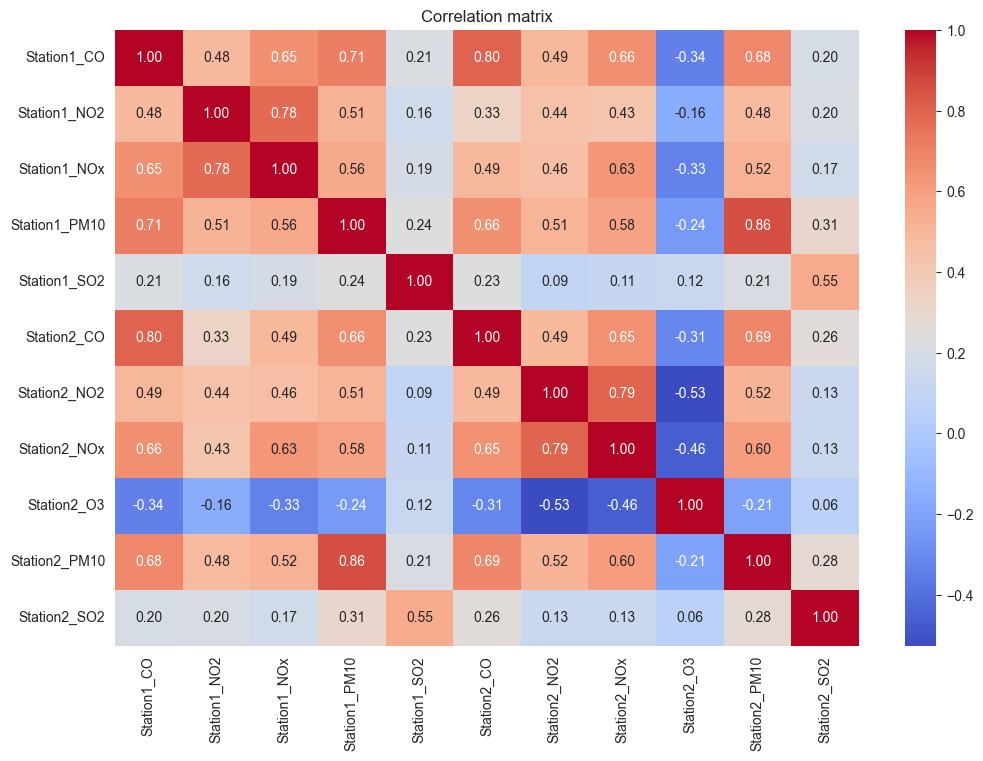

In [206]:
import seaborn as sns


corr_matrix = df_values[df_values.columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [207]:
df_val = pd.DataFrame(df_pm25)
df_val = df_pm25.drop(["Year", "Month", "Season", "Day", "WeekDay"], axis=1)
df_val = df_val.replace({',': '.'}, regex=True)


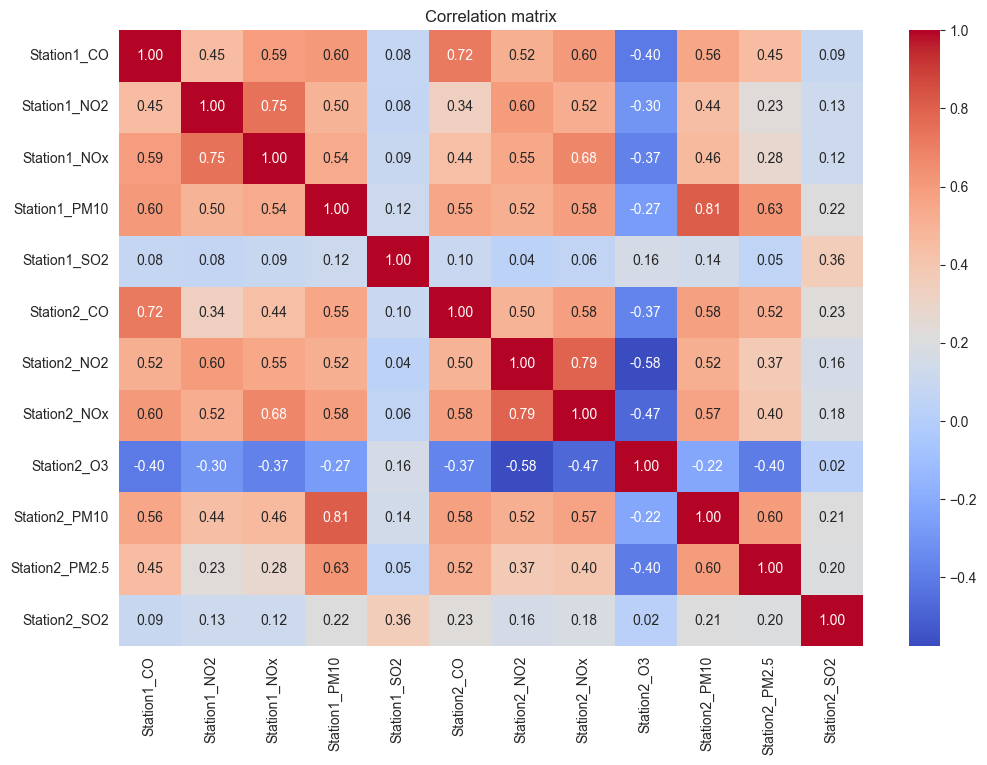

In [208]:
import seaborn as sns


corr_matrix = df_val[df_val.columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")
plt.show()

In [209]:
def plot_mean(df, grouping):
    station1_mean = df.groupby(grouping)['Station1_PM10'].mean()
    station2_mean = df.groupby(grouping)['Station2_PM10'].mean()
    
    station1_mean.plot(label='Kalotaszeg ter station - PM10', marker='o')  
    station2_mean.plot(label='Hajnal ut station - PM10', marker='o') 
    
    plt.title(f'{grouping} Average PM10 Levels') 
    plt.xlabel(f'{grouping}')                      
    plt.ylabel('PM10 Concentration')        
    plt.legend()                           
    
    plt.show()

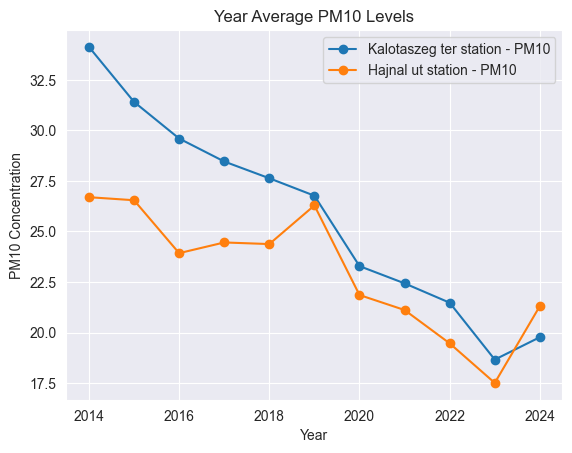

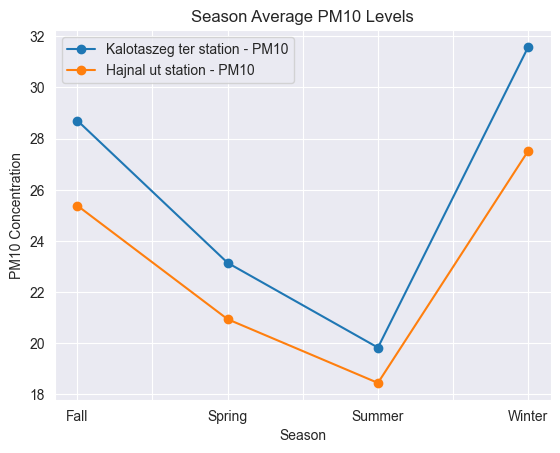

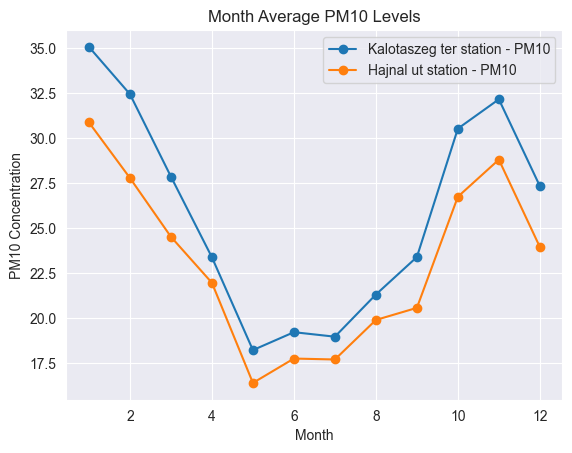

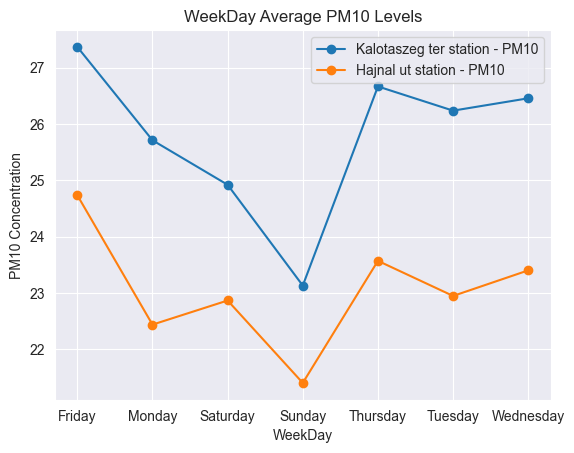

In [210]:
plot_mean(df_pollutants, "Year")
plot_mean(df_pollutants, "Season")
plot_mean(df_pollutants, "Month")
plot_mean(df_pollutants, "WeekDay")

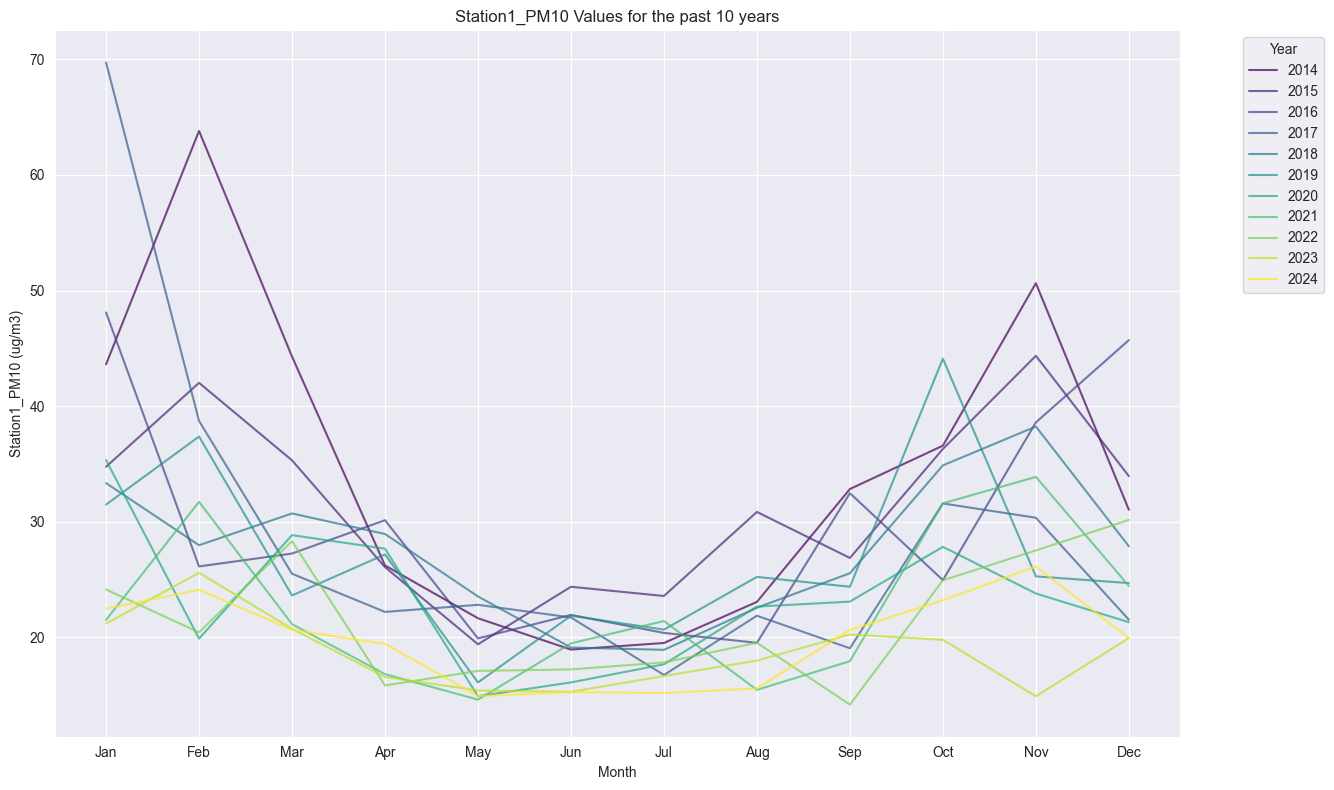

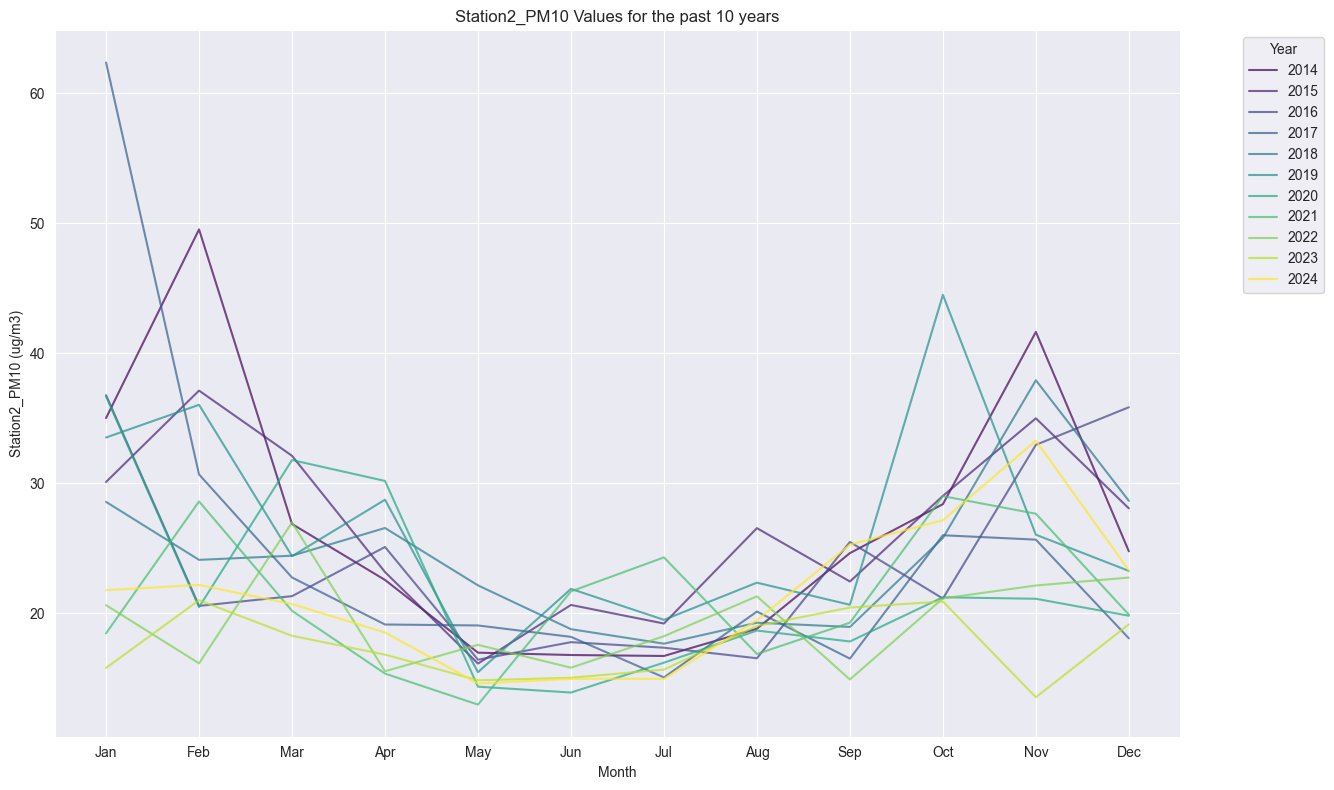

In [211]:
from matplotlib import cm

def plot_aqi(df, value):
    unique_years = df['Year'].unique()
    months = np.arange(1, 13) 
    
    plt.figure(figsize=(12, 8))
    
    colors = cm.viridis(np.linspace(0, 1, len(unique_years)))
    
    for i, year in enumerate(unique_years):
        monthly_data = df[df['Year'] == year].groupby('Month')[value].mean()
    
        plt.plot(
            months, 
            monthly_data, 
            color=colors[i], 
            alpha=0.7, 
            label=f"{year}"
        )
    
    plt.title(f"{value} Values for the past 10 years")
    plt.xlabel("Month")
    plt.ylabel(f"{value} (ug/m3)")
    
    plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
plot_aqi(df_pollutants, "Station1_PM10")
plot_aqi(df_pollutants, "Station2_PM10")


<Axes: xlabel='Date'>

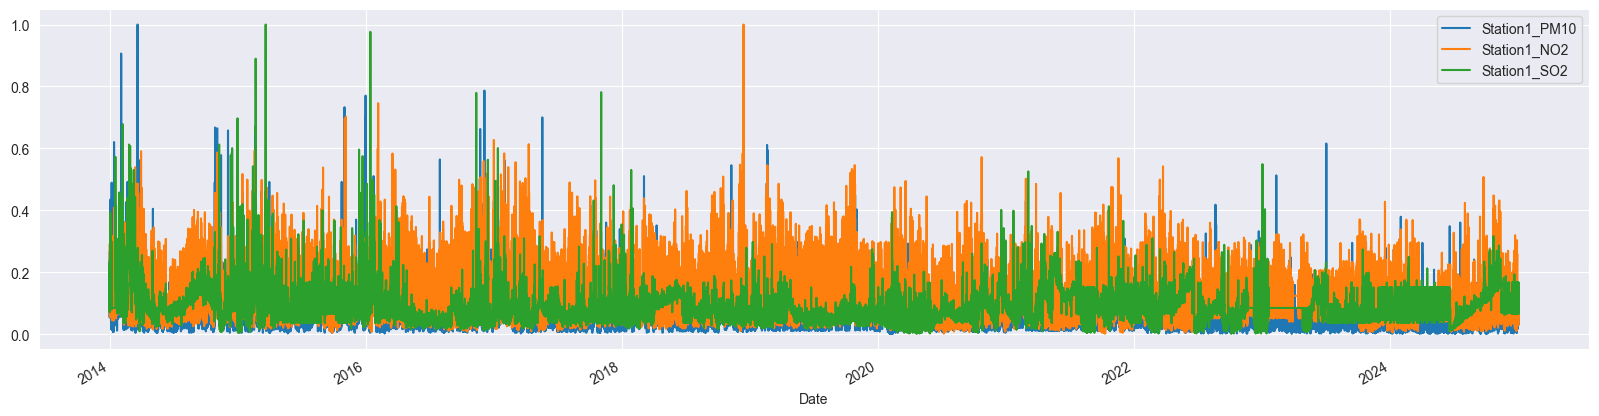

In [212]:
fig, ax = plt.subplots(figsize=(20, 5))

candidates = df_pollutants[['Station1_PM10','Station1_NO2', 'Station1_SO2']]
candidates /= candidates.max(axis=0)
candidates.plot(ax=ax)

<Axes: xlabel='Date'>

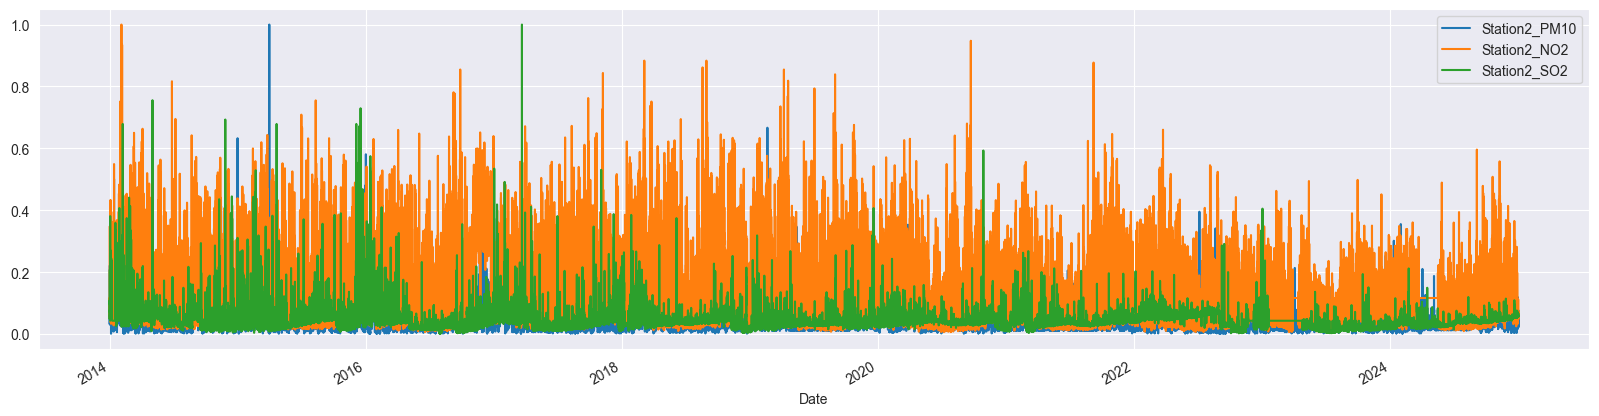

In [213]:
fig1, ax1 = plt.subplots(figsize=(20, 5))
candidates1 = df_pollutants[['Station2_PM10', 'Station2_NO2', 'Station2_SO2']]
candidates1 /= candidates1.max(axis=0)
candidates1.plot(ax=ax1)

In [214]:
def plot_with_threshold(df, pollutant, threshold):
    fig, ax = plt.subplots(figsize=(20, 5))
    candidates = df[pollutant]
    ax.axhline(y=threshold, linestyle='--', linewidth=1, color='red')
    candidates.plot()

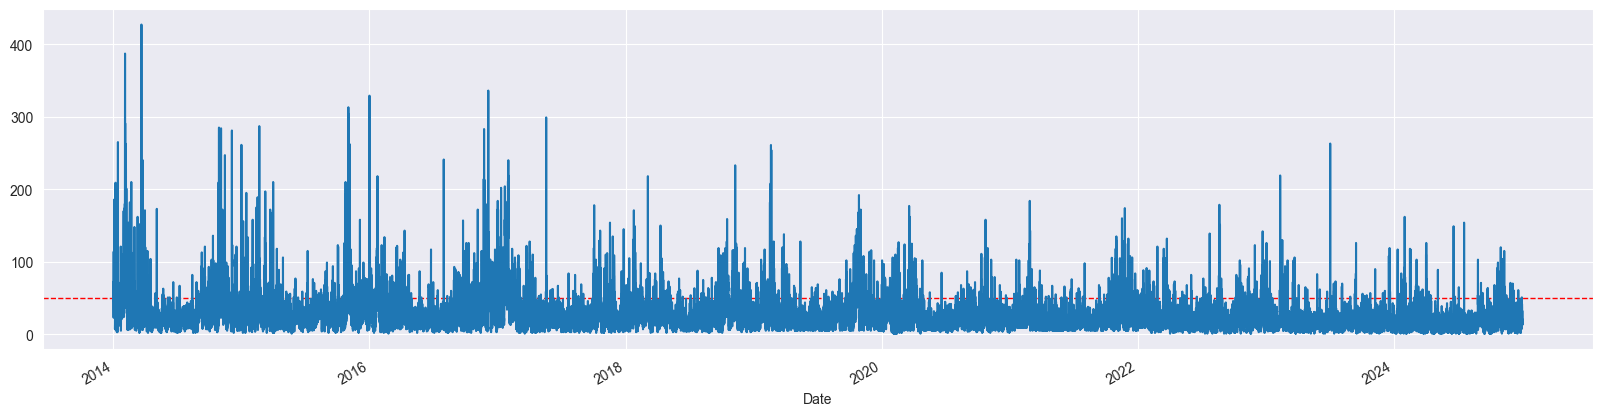

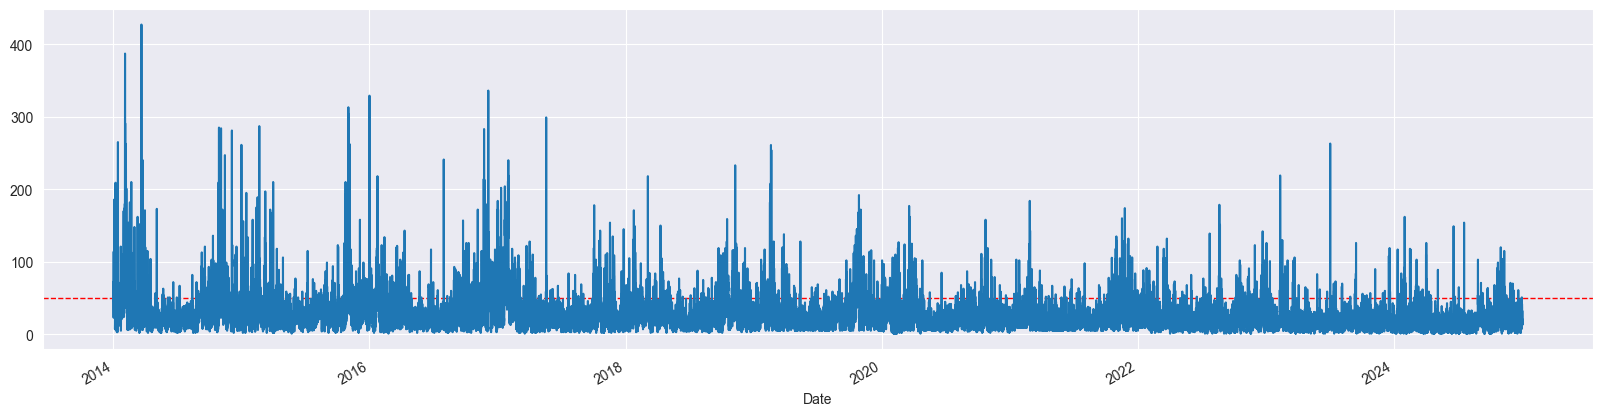

In [215]:
plot_with_threshold(df_pollutants, "Station1_PM10", 50)

plot_with_threshold(df_pollutants, "Station1_PM10", 50)

In [216]:
df_pollutants.to_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/cleaned_AQI_hourly.csv")

In [217]:
wind_df = pd.read_csv("/data/final_data/wind.csv")
wind_df.shape

(4018, 33)

In [218]:
cols_to_keep = [
       'datetime', 'temp', 'humidity', 'precip', 
       'precipcover', 'cloudcover',
       'windspeed', 'winddir', 'visibility',
       ]

In [219]:
wind_df = wind_df[cols_to_keep]

In [220]:
wind_df.set_index('datetime', inplace=True)

In [221]:
wind_df

,temp,humidity,precip,precipcover,cloudcover,windspeed,winddir,visibility
datetime,,,,,,,,
2023-05-01,15.5,49.0,0.096,4.17,8.3,21.4,21.2,10.0
2023-05-02,17.6,51.6,0.000,0.00,43.8,14.6,121.4,11.7
2023-05-03,17.1,60.2,0.000,0.00,77.3,25.9,20.7,11.4
2023-05-04,16.0,59.0,0.004,4.17,65.9,24.6,5.3,11.1
2023-05-05,15.6,60.6,0.001,4.17,48.6,14.1,297.9,10.0
...,...,...,...,...,...,...,...,...
2015-12-27,2.3,99.1,0.001,4.17,71.9,12.1,211.2,0.6
2015-12-28,1.2,99.1,0.007,12.50,100.0,10.8,245.1,1.6
2015-12-29,2.7,85.8,0.196,4.17,46.3,24.9,30.5,14.5


In [222]:
wind_df.isnull().sum()

temp           0
humidity       0
precip         0
precipcover    0
cloudcover     0
windspeed      0
winddir        0
visibility     0
dtype: int64

In [223]:
df_pollutants.index = pd.to_datetime(df_pollutants.index).normalize() 
wind_df.index = pd.to_datetime(wind_df.index).normalize()

In [224]:
# final_df = pd.merge(df, wind_df, left_index=True, right_index=True)

In [225]:
# final_df.to_csv("final_data.csv")

In [226]:
df_pollutants['is_heating_season'] = np.where(df_pollutants['Season'].isin(["Winter", "Fall"]), 1, 0)
df_pollutants['is_work_day'] = np.where(df_pollutants['WeekDay'].isin(["Monay", "Tuesday", "Wednesday", "Thursday", "Friday"]), 1, 0)

In [227]:
df_pollutants.drop(["Year", "Season", "WeekDay", "Day", "Month"], axis=1, inplace=True)
df_pollutants

,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_SO2,is_heating_season,is_work_day
Date,,,,,,,,,,,,,
2014-01-01,857.0,19.2,31.5,72.0,5.38,880.0,10.3,11.5,NaN,40.0,8.3,1,1
2014-01-01,845.0,21.8,33.0,58.0,4.66,933.0,12.0,16.1,NaN,52.0,7.3,1,1
2014-01-01,819.0,27.9,44.6,55.0,4.78,862.0,12.7,14.9,NaN,29.0,6.8,1,1
2014-01-01,869.0,29.4,49.1,50.0,4.94,936.0,11.6,13.8,NaN,29.0,6.4,1,1
2014-01-01,841.0,33.8,57.4,51.0,3.02,877.0,12.9,15.4,NaN,33.0,3.7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,704.6,20.3,37.2,23.0,2.84,791.0,10.6,11.2,59.2,19.2,4.6,1,1
2024-12-31,673.4,21.7,36.1,20.0,3.90,772.0,10.4,11.2,59.2,19.8,4.4,1,1
2024-12-31,561.6,17.5,30.6,24.0,3.30,799.0,9.5,10.0,59.2,23.6,4.7,1,1


In [228]:
wind_df["winddir_rad"] = np.deg2rad(wind_df["winddir"])

wind_df["winddir_sin"] = np.sin(wind_df["winddir_rad"])
wind_df["winddir_cos"] = np.cos(wind_df["winddir_rad"])

wind_df.drop(columns=["winddir", "winddir_rad"], inplace=True)
wind_df

,temp,humidity,precip,precipcover,cloudcover,windspeed,visibility,winddir_sin,winddir_cos
datetime,,,,,,,,,
2023-05-01,15.5,49.0,0.096,4.17,8.3,21.4,10.0,0.361625,0.932324
2023-05-02,17.6,51.6,0.000,0.00,43.8,14.6,11.7,0.853551,-0.521010
2023-05-03,17.1,60.2,0.000,0.00,77.3,25.9,11.4,0.353475,0.935444
2023-05-04,16.0,59.0,0.004,4.17,65.9,24.6,11.1,0.092371,0.995725
2023-05-05,15.6,60.6,0.001,4.17,48.6,14.1,10.0,-0.883766,0.467930
...,...,...,...,...,...,...,...,...,...
2015-12-27,2.3,99.1,0.001,4.17,71.9,12.1,0.6,-0.518027,-0.855364
2015-12-28,1.2,99.1,0.007,12.50,100.0,10.8,1.6,-0.907044,-0.421036
2015-12-29,2.7,85.8,0.196,4.17,46.3,24.9,14.5,0.507538,0.861629


In [229]:
wind_df.isna().sum()
# df.fillna(method="ffill", inplace=True)  # Forward fill


temp           0
humidity       0
precip         0
precipcover    0
cloudcover     0
windspeed      0
visibility     0
winddir_sin    0
winddir_cos    0
dtype: int64

In [230]:
# df.reset_index(inplace=True)
df_pollutants.reset_index(inplace=True)
df_pollutants['timestamp'] = df_pollutants['Date'].dt.date
df_pollutants

,Date,Station1_CO,Station1_NO2,Station1_NOx,Station1_PM10,Station1_SO2,Station2_CO,Station2_NO2,Station2_NOx,Station2_O3,Station2_PM10,Station2_SO2,is_heating_season,is_work_day,timestamp
0,2014-01-01,857.0,19.2,31.5,72.0,5.38,880.0,10.3,11.5,NaN,40.0,8.3,1,1,2014-01-01
1,2014-01-01,845.0,21.8,33.0,58.0,4.66,933.0,12.0,16.1,NaN,52.0,7.3,1,1,2014-01-01
2,2014-01-01,819.0,27.9,44.6,55.0,4.78,862.0,12.7,14.9,NaN,29.0,6.8,1,1,2014-01-01
3,2014-01-01,869.0,29.4,49.1,50.0,4.94,936.0,11.6,13.8,NaN,29.0,6.4,1,1,2014-01-01
4,2014-01-01,841.0,33.8,57.4,51.0,3.02,877.0,12.9,15.4,NaN,33.0,3.7,1,1,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96419,2024-12-31,704.6,20.3,37.2,23.0,2.84,791.0,10.6,11.2,59.2,19.2,4.6,1,1,2024-12-31
96420,2024-12-31,673.4,21.7,36.1,20.0,3.90,772.0,10.4,11.2,59.2,19.8,4.4,1,1,2024-12-31
96421,2024-12-31,561.6,17.5,30.6,24.0,3.30,799.0,9.5,10.0,59.2,23.6,4.7,1,1,2024-12-31
96422,2024-12-31,557.2,13.8,19.0,26.0,2.84,745.0,9.9,10.2,59.2,21.0,4.6,1,1,2024-12-31


In [231]:
df_wind_resampled = wind_df.resample('H').ffill()  
df_wind_resampled['Date'] = df_wind_resampled.index

/var/folders/0c/_lmn88gn06gfqbnmjydqyxgm0000gn/T/ipykernel_2754/501501499.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_wind_resampled = wind_df.resample('H').ffill()


In [232]:
wind_df.reset_index()
wind_df['timestamp'] = wind_df.index.date
#wind_df['timestamp'] = wind_df['datetime']

In [235]:
wind_df['timestamp'] = pd.to_datetime(wind_df['timestamp'])

df_merged = pd.merge(df_pollutants, wind_df, left_on='timestamp', right_on=wind_df['timestamp'].dt.date, how='left')

# Drop the extra 'timestamp' column from wind data, if needed
df_merged.drop(columns='timestamp_y', inplace=True)



In [236]:
# final_df.to_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/final_data/data_for_model.csv")
print(df_merged)

        timestamp       Date  Station1_CO  Station1_NO2  Station1_NOx  \
0      2014-01-01 2014-01-01        857.0          19.2          31.5   
1      2014-01-01 2014-01-01        845.0          21.8          33.0   
2      2014-01-01 2014-01-01        819.0          27.9          44.6   
3      2014-01-01 2014-01-01        869.0          29.4          49.1   
4      2014-01-01 2014-01-01        841.0          33.8          57.4   
...           ...        ...          ...           ...           ...   
96419  2024-12-31 2024-12-31        704.6          20.3          37.2   
96420  2024-12-31 2024-12-31        673.4          21.7          36.1   
96421  2024-12-31 2024-12-31        561.6          17.5          30.6   
96422  2024-12-31 2024-12-31        557.2          13.8          19.0   
96423  2024-12-31 2024-12-31        543.4          16.0          22.3   

       Station1_PM10  Station1_SO2  Station2_CO  Station2_NO2  Station2_NOx  \
0               72.0          5.38        88

In [ ]:
# final_df.columns

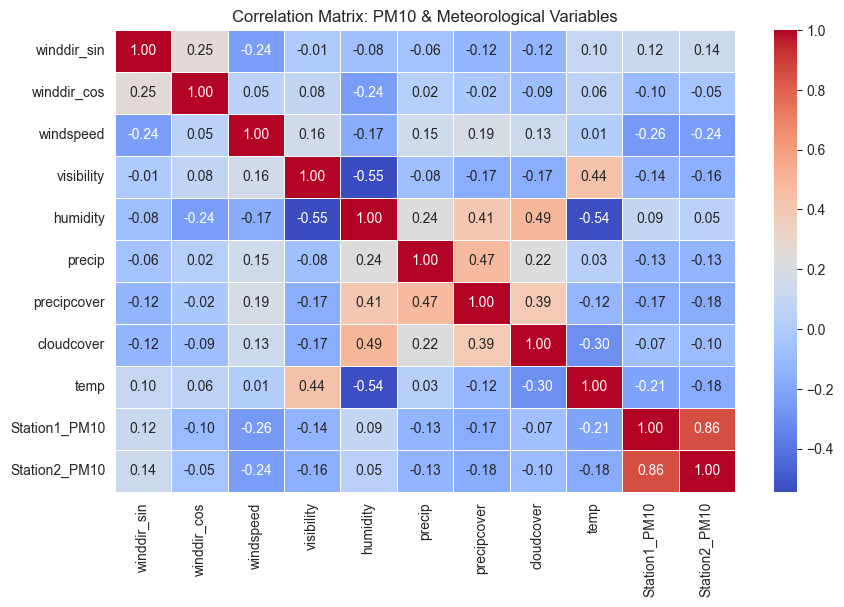

In [238]:
meteorological_data = [
    "winddir_sin",
    "winddir_cos",
    "windspeed",
    "visibility",
    "humidity",
    "precip",
    "precipcover",
    "cloudcover",
    "temp",
    
]
pm10 = "Station1_PM10"
pm10_2 = "Station2_PM10"

corr_data = df_merged[meteorological_data + [pm10, pm10_2]]  
corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: PM10 & Meteorological Variables")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=final_df, x="windspeed", y="Station1_PM10", alpha=0.5)

sns.regplot(data=final_df, x="windspeed", y="Station1_PM10", scatter=False, color="red")

plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PM10 Concentration")
plt.title("Wind Speed vs PM10")
plt.show()


In [239]:
df_merged.to_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/final_data/hourly_final.csv")